In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [37]:
# Load Dataset
mnist = input_data.read_data_sets('./dataset/input_data/', one_hot=True)

Extracting ./dataset/input_data/train-images-idx3-ubyte.gz
Extracting ./dataset/input_data/train-labels-idx1-ubyte.gz
Extracting ./dataset/input_data/t10k-images-idx3-ubyte.gz
Extracting ./dataset/input_data/t10k-labels-idx1-ubyte.gz


In [38]:
# Reset Default Graph
tf.reset_default_graph()



In [39]:


#apply stacked auto encoder
# 1st Layer: Input Layer
n_inputs = 784

# 1st Hidden Layer Neurons
hidden1 = 392

# 2nd Hidden Layer Neurons
hidden2 = 196

# 3rd Hidden Layer Neurons
hidden3 = 392

# Output Layer Neurons
out = 784
#learning rate
lr = 0.001

In [40]:
activation_fxn = tf.nn.relu

In [41]:
def leaky_relu(x, leak=0.2, name="lrelu"):
    """Leaky rectifier.
    Parameters
    ----------
    x : Tensor
        The tensor to apply the nonlinearity to.
    leak : float, optional
        Leakage parameter.
    name : str, optional
        Variable scope to use.
    Returns
    -------
    x : Tensor
        Output of the nonlinearity.
    """
    with tf.variable_scope(name):
        f1 = 0.5 * (1 + leak)
        f2 = 0.5 * (1 - leak)
        return f1 * x + f2 * abs(x)

In [42]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])

In [43]:
# Initialize Weights
initializer = tf.variance_scaling_initializer()
# Weights for Autoencoder Layers
w1 = tf.Variable(initializer([n_inputs,hidden1]), dtype=tf.float32)
w2 = tf.Variable(initializer([hidden1,hidden2]), dtype=tf.float32)
w3 = tf.Variable(initializer([hidden2,hidden3]), dtype=tf.float32)
w4 = tf.Variable(initializer([hidden3,out]), dtype=tf.float32)


In [44]:
# Initialize Bias
b1 = tf.Variable(tf.zeros(hidden1))
b2 = tf.Variable(tf.zeros(hidden2))
b3 = tf.Variable(tf.zeros(hidden3))
b4 = tf.Variable(tf.zeros(out))

In [45]:
# Make Hidden Layers
hid_layer1 = activation_fxn(tf.matmul(X,w1) + b1)
hid_layer2 = activation_fxn(tf.matmul(hid_layer1,w2) + b2)
hid_layer3 = activation_fxn(tf.matmul(hid_layer2,w3) + b3)
out_layer = activation_fxn(tf.matmul(hid_layer3,w4) + b4)

In [46]:
loss = tf.reduce_mean(tf.square(out_layer - X))

In [47]:
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

In [48]:
init = tf.global_variables_initializer()


In [49]:


saver = tf.train.Saver()



In [50]:
epochs = 30
# 20, 150
batch_size = 200

with tf.Session() as sess:
    sess.run(init)
    
    for e in range(epochs):
        n_batches = mnist.train.num_examples // batch_size
        
        for i in range(n_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={X: X_batch})
        
        training_loss = loss.eval(feed_dict={X:X_batch})
        print('EPOCH: {}\t  LOSS: {}'.format(e, training_loss))
    saver.save(sess,'my_train_model')

EPOCH: 0	  LOSS: 0.010447485372424126
EPOCH: 1	  LOSS: 0.007638574577867985
EPOCH: 2	  LOSS: 0.007522951811552048
EPOCH: 3	  LOSS: 0.006712491624057293
EPOCH: 4	  LOSS: 0.005896297283470631
EPOCH: 5	  LOSS: 0.005897353403270245
EPOCH: 6	  LOSS: 0.00549041572958231
EPOCH: 7	  LOSS: 0.006313453894108534
EPOCH: 8	  LOSS: 0.005953378044068813
EPOCH: 9	  LOSS: 0.006157069467008114
EPOCH: 10	  LOSS: 0.005871045868843794
EPOCH: 11	  LOSS: 0.005316970404237509
EPOCH: 12	  LOSS: 0.0059906914830207825
EPOCH: 13	  LOSS: 0.005638982634991407
EPOCH: 14	  LOSS: 0.00549703324213624
EPOCH: 15	  LOSS: 0.005625990219414234
EPOCH: 16	  LOSS: 0.005595851689577103
EPOCH: 17	  LOSS: 0.005115837790071964
EPOCH: 18	  LOSS: 0.0055975946597754955
EPOCH: 19	  LOSS: 0.005007156170904636
EPOCH: 20	  LOSS: 0.005479807034134865
EPOCH: 21	  LOSS: 0.005456847138702869
EPOCH: 22	  LOSS: 0.00562385143712163
EPOCH: 23	  LOSS: 0.005042579956352711
EPOCH: 24	  LOSS: 0.004737885668873787
EPOCH: 25	  LOSS: 0.0053683165460824

In [52]:


saver = tf.train.Saver()


n_test = 10

with tf.Session() as sess:
    saver.restore(sess,'my_train_model')
    
    results = out_layer.eval(feed_dict={X: mnist.test.images[:n_test]})

INFO:tensorflow:Restoring parameters from my_train_model


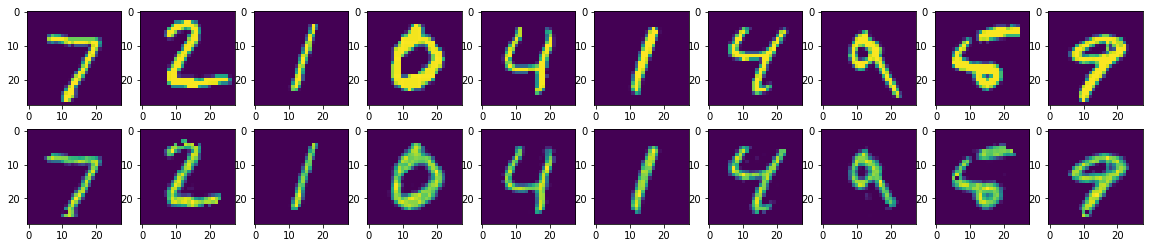

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(20,4))
for i in range(n_test):
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(results[i],(28,28)))



In [54]:
n_test = 10

with tf.Session() as sess:
    saver.restore(sess,'my_train_model')
    
    results = hid_layer2.eval(feed_dict={X: mnist.test.images[:n_test]})

INFO:tensorflow:Restoring parameters from my_train_model


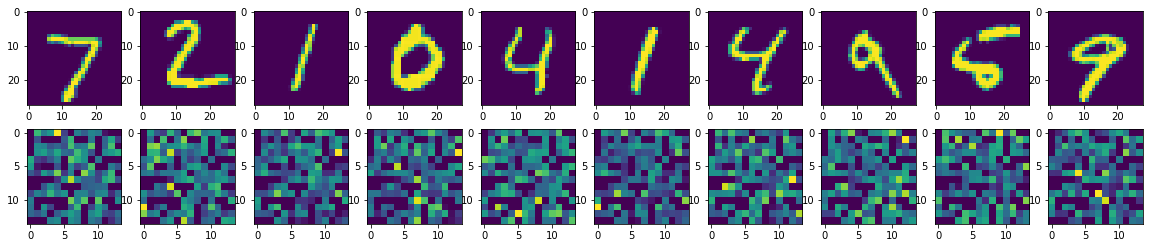

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(20,4))
for i in range(n_test):
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(results[i],(14,14)))